<a href="https://colab.research.google.com/github/jahnavimidde/VsemML/blob/main/unit5_neuralnetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import accuracy_score

A **Perceptron** is the simplest type of artificial neural network

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
print(y)
#taking only two classes for applying simple perceptron
X_binary = X[y != 2]
y_binary = y[y != 2]
print(y_binary)

scaler = StandardScaler()
X_binary = scaler.fit_transform(X_binary)
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [3]:
#simple perceptron
weights = np.random.randn(X_train.shape[1])
bias = np.random.randn()
lr = 0.1
epochs = 100

for epoch in range(epochs):
    for xi, target in zip(X_train, y_train):
        linear_output = np.dot(xi, weights) + bias
        y_pred = 1 if linear_output >= 0 else 0
        error = target - y_pred
        weights += lr * error * xi
        bias += lr * error

#checking accuracy of perceptron
preds = [1 if np.dot(x, weights) + bias >= 0 else 0 for x in X_test]
print("Accuracy (Simple Perceptron):", accuracy_score(y_test, preds))

Accuracy (Simple Perceptron): 1.0


The **sigmoid function** is a mathematical function that maps any input value to an output between **0 and 1**

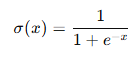

In [4]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([0, 0, 0, 1])

In [5]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def train_perceptron(X, y, lr=0.1, epochs=10000):
    weights = np.random.randn(X.shape[1])
    bias = np.random.randn()
    for _ in range(epochs):
        for xi, target in zip(X, y):
            z = np.dot(xi, weights) + bias
            y_pred = sigmoid(z)
            error = target - y_pred
            weights += lr * error * xi
            bias += lr * error
    return weights, bias

#AND Gate
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y_and = np.array([0,0,0,1])
w_and, b_and = train_perceptron(X, y_and)

print("\nAND Gate Predictions:")
for x in X:
    print(f"{x} -> {sigmoid(np.dot(x, w_and)+b_and) >= 0.5}")

#OR Gate
y_or = np.array([0,1,1,1])
w_or, b_or = train_perceptron(X, y_or)

print("\nOR Gate Predictions:")
for x in X:
    print(f"{x} -> {sigmoid(np.dot(x, w_or)+b_or) >= 0.5}")

#XOR Gate (non-linear, perceptron alone fails)
y_xor = np.array([0,1,1,0])
w_xor, b_xor = train_perceptron(X, y_xor)

print("\nXOR Gate Predictions (Perceptron fails for XOR):")
for x in X:
    print(f"{x} -> {sigmoid(np.dot(x, w_xor)+b_xor) >= 0.5}")



AND Gate Predictions:
[0 0] -> False
[0 1] -> False
[1 0] -> False
[1 1] -> True

OR Gate Predictions:
[0 0] -> False
[0 1] -> True
[1 0] -> True
[1 1] -> True

XOR Gate Predictions (Perceptron fails for XOR):
[0 0] -> True
[0 1] -> True
[1 0] -> False
[1 1] -> False


**why is it failing for xor?**
That’s why a linear model (like a perceptron) fails — it can only create a straight-line decision boundary.

Each epoch:

You predict output using sigmoid.

Compute error between true label (target) and predicted (y_pred).

Adjust weights (w) and bias (b) in direction of error.

**So the perceptron learns by reducing prediction error gradually.**

An MLP (Multilayer Perceptron) is a type of feedforward neural network consisting of:

Input layer – takes your features (X)

Hidden layer(s) – where non-linear transformations happen

Output layer – gives predictions (like 0 or 1)

Unlike a simple perceptron, MLP can learn non-linear decision boundaries

In [6]:
from sklearn.neural_network import MLPClassifier

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])  # XOR logic

mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=10000)
mlp.fit(X, y)

print("\nMLP (Single Hidden Layer) for XOR:")
for x in X:
    print(f"{x} -> {mlp.predict([x])[0]}")


MLP (Single Hidden Layer) for XOR:
[0 0] -> 1
[0 1] -> 1
[1 0] -> 1
[1 1] -> 1


parameters of mlp

---
hidden layer-- (internal computations) , used for handling complex data goes through decisions

activation -- introduces non-linearity and helps faster training.

max_iter-- no.of iterations

In [8]:
#MLP ON minst dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X_mnist, y_mnist = mnist.data / 255.0, mnist.target.astype(int)

#Subset for faster training
X_train, X_test, y_train, y_test = train_test_split(X_mnist[:10000], y_mnist[:10000], test_size=0.2, random_state=42)

mlp_mnist = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=20)
mlp_mnist.fit(X_train, y_train)
y_pred = mlp_mnist.predict(X_test)
print("MNIST Accuracy:", accuracy_score(y_test, y_pred))

MNIST Accuracy: 0.947


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
